In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

In [3]:
# Load the data
dataset_path = './Data_aggregated_29-08-2024.csv'
df = pd.read_csv(dataset_path)

column_headers = list(df.columns.values)
print("The Column Header:", column_headers)

The Column Header: ['id', 'gender', 'age', 'subtype', 'size_cm', 'packyears', 'stage', 'pd-l1', 'lvi', 'vi', 'pni', 'pii', 'foxp3', 'egfr', 'ros1', 'alk', 'ntrk', 'grade', 'elasticity_nucleus_mpa_avg', 'elasticity_nucleus_mpa_med', 'elasticity_nucleus_mpa_std', 'elasticity_nucleus_mpa_min', 'elasticity_nucleus_mpa_max', 'elasticity_cytoplasm_mpa_avg', 'elasticity_cytoplasm_mpa_med', 'elasticity_cytoplasm_mpa_std', 'elasticity_cytoplasm_mpa_min', 'elasticity_cytoplasm_mpa_max', 'cell_width_microm_avg', 'cell_cytoplasm_height_avg', 'cell_nucleus_height_avg', 'cell_width_microm_med', 'cell_cytoplasm_height_med', 'cell_nucleus_height_med', 'cell_width_microm_std', 'cell_cytoplasm_height_std', 'cell_nucleus_height_std', 'cell_width_microm_min', 'cell_cytoplasm_height_min', 'cell_nucleus_height_min', 'cell_width_microm_max', 'cell_cytoplasm_height_max', 'cell_nucleus_height_max', 'rms_nm_avg', 'rms_nm_std_avg', 'rms_nm_med', 'rms_nm_std_med', 'rms_nm_std', 'rms_nm_std_std', 'rms_nm_min', 'rm

In [4]:
columns_to_drop = ['id']
df = df.drop(columns=columns_to_drop)

column_headers = list(df.columns.values)
print("The Column Header after dropping unnecesary columns: \n", column_headers)

The Column Header after dropping unnecesary columns: 
 ['gender', 'age', 'subtype', 'size_cm', 'packyears', 'stage', 'pd-l1', 'lvi', 'vi', 'pni', 'pii', 'foxp3', 'egfr', 'ros1', 'alk', 'ntrk', 'grade', 'elasticity_nucleus_mpa_avg', 'elasticity_nucleus_mpa_med', 'elasticity_nucleus_mpa_std', 'elasticity_nucleus_mpa_min', 'elasticity_nucleus_mpa_max', 'elasticity_cytoplasm_mpa_avg', 'elasticity_cytoplasm_mpa_med', 'elasticity_cytoplasm_mpa_std', 'elasticity_cytoplasm_mpa_min', 'elasticity_cytoplasm_mpa_max', 'cell_width_microm_avg', 'cell_cytoplasm_height_avg', 'cell_nucleus_height_avg', 'cell_width_microm_med', 'cell_cytoplasm_height_med', 'cell_nucleus_height_med', 'cell_width_microm_std', 'cell_cytoplasm_height_std', 'cell_nucleus_height_std', 'cell_width_microm_min', 'cell_cytoplasm_height_min', 'cell_nucleus_height_min', 'cell_width_microm_max', 'cell_cytoplasm_height_max', 'cell_nucleus_height_max', 'rms_nm_avg', 'rms_nm_std_avg', 'rms_nm_med', 'rms_nm_std_med', 'rms_nm_std', 'rms_

In [6]:
# Encoding the tumor stage in eraly (0) and late (1) stage:
df['stage'] = df['stage'].str.lower()

df.loc[df['stage'] == "ia1", 'stage_binary'] = 0
df.loc[df['stage'] == "ia2", 'stage_binary'] = 0
df.loc[df['stage'] == "ia3", 'stage_binary'] = 0
df.loc[df['stage'] == "ib", 'stage_binary'] = 0
df.loc[df['stage'] == "iia", 'stage_binary'] = 0
df.loc[df['stage'] == "iib", 'stage_binary'] = 0
df.loc[df['stage'] == "iiia", 'stage_binary'] = 1
df.loc[df['stage'] == "iiib", 'stage_binary'] = 1
df.loc[df['stage'] == "iiic", 'stage_binary'] = 1

columns_to_drop = ['stage']
df = df.drop(columns=columns_to_drop) 

In [7]:
print(f"Total sample count: {len(df.index)}\n")
print("Missing values in each column:")
print(df.isnull().sum())

Total sample count: 37

Missing values in each column:
gender                           0
age                              0
subtype                          0
size_cm                          0
packyears                        0
pd-l1                            0
lvi                              0
vi                               0
pni                              0
pii                              0
foxp3                            0
egfr                             0
ros1                             0
alk                              0
ntrk                             0
grade                            0
elasticity_nucleus_mpa_avg      22
elasticity_nucleus_mpa_med      22
elasticity_nucleus_mpa_std      22
elasticity_nucleus_mpa_min      22
elasticity_nucleus_mpa_max      22
elasticity_cytoplasm_mpa_avg    22
elasticity_cytoplasm_mpa_med    22
elasticity_cytoplasm_mpa_std    22
elasticity_cytoplasm_mpa_min    22
elasticity_cytoplasm_mpa_max    22
cell_width_microm_avg           17


In [8]:
# Shapiro-Wilk test to test if the data is noramlly distributed. 
# p<0.05 indicates that is seriously deviates from normal distribution
continuous_vars = ['age', 'size_cm', 'packyears', 'pd-l1', 'foxp3']

for var in continuous_vars:
    stat, p = stats.shapiro(df[var])
    print(f"Shapiro-Wilk test for {var}: statistic={stat:.3f}, p-value={p:.3f}")

# All except for pack-years smoked deviate from normal distribution

Shapiro-Wilk test for age: statistic=0.939, p-value=0.044
Shapiro-Wilk test for size_cm: statistic=0.932, p-value=0.025
Shapiro-Wilk test for packyears: statistic=0.949, p-value=0.087
Shapiro-Wilk test for pd-l1: statistic=0.847, p-value=0.000
Shapiro-Wilk test for foxp3: statistic=0.800, p-value=0.000


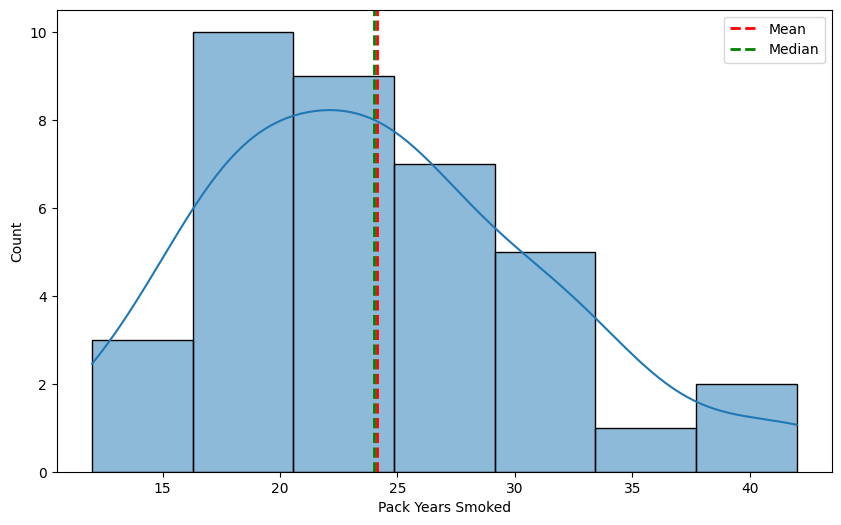

In [10]:
# Plotting histogram for pack years smoked to visually evaluate if it is normally distributed
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='packyears', kde=True, bins='auto')
plt.xlabel('Pack Years Smoked')
plt.ylabel('Count')

# Add vertical lines for mean and median
plt.axvline(df['packyears'].mean(), color='r', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(df['packyears'].median(), color='g', linestyle='dashed', linewidth=2, label='Median')

plt.legend()
plt.show()

In [7]:
corr_matrix = df[continuous_vars].corr()
print("\nCorrelation matrix:")
print(corr_matrix)


Correlation matrix:
                        age  tumor_size  pack_years_smoked     pd-l1     foxp3
age                1.000000    0.146444           0.259369  0.127859  0.002265
tumor_size         0.146444    1.000000           0.109570  0.254376  0.240739
pack_years_smoked  0.259369    0.109570           1.000000  0.116869  0.102449
pd-l1              0.127859    0.254376           0.116869  1.000000  0.757428
foxp3              0.002265    0.240739           0.102449  0.757428  1.000000


In [12]:
# Chi-square test to test if there is a link between gender and tumor subtype
crosstab = pd.crosstab(df['subtype'], df['gender'])
chi2, p, dof, expected = stats.chi2_contingency(crosstab)
print(f"\n Chi-square test for tumor type vs gender: chi2={chi2:.3f}, p-value={p:.3f}")


 Chi-square test for tumor type vs gender: chi2=8.416, p-value=0.004


In [15]:
# Mann-Whitney U tests (small samples, not normally distributed)
adenocarcinoma_pdl1 = df[df['subtype'] == 1]['pd-l1']
squamous_pdl1 = df[df['subtype'] == 2]['pd-l1']
u_stat, p_value = stats.mannwhitneyu(adenocarcinoma_pdl1, squamous_pdl1)
print(f"\nMann-Whitney U test for PD-L1 expression between tumor types: U-statistic={u_stat:.3f}, p-value={p_value:.3f}")

adenocarcinoma_smoking = df[df['subtype'] == 1]['packyears']
squamous_smoking = df[df['subtype'] == 2]['packyears']
u_stat, p_value = stats.mannwhitneyu(adenocarcinoma_smoking, squamous_smoking)
print(f"\nMann-Whitney U test for smoking experience between tumor types: U-statistic={u_stat:.3f}, p-value={p_value:.3f}")

adenocarcinoma_age = df[df['subtype'] == 1]['age']
squamous_age = df[df['subtype'] == 2]['age']
u_stat, p_value = stats.mannwhitneyu(adenocarcinoma_smoking, squamous_smoking)
print(f"\nMann-Whitney U test for age between tumor types: U-statistic={u_stat:.3f}, p-value={p_value:.3f}")

early_size = df[df['stage_binary'] == 0]['size_cm']
late_size = df[df['stage_binary'] == 1]['size_cm']
u_stat, p_value = stats.mannwhitneyu(early_size, late_size)
print(f"\nMann-Whitney U test for tumor size between tumor stages: U-statistic={u_stat:.3f}, p-value={p_value:.3f}")

adeno_early_size = df[(df['stage_binary'] == 0) & (df['subtype'] == 2)]['size_cm']
adeno_late_size = df[(df['stage_binary'] == 1) & (df['subtype'] == 2)]['size_cm']
u_stat, p_value = stats.mannwhitneyu(adeno_early_size, adeno_late_size)
print(f"\nMann-Whitney U test for adenocarcinoma tumor size between tumor stages: U-statistic={u_stat:.3f}, p-value={p_value:.3f}")


Mann-Whitney U test for PD-L1 expression between tumor types: U-statistic=154.000, p-value=0.632

Mann-Whitney U test for smoking experience between tumor types: U-statistic=257.000, p-value=0.008

Mann-Whitney U test for age between tumor types: U-statistic=257.000, p-value=0.008

Mann-Whitney U test for tumor size between tumor stages: U-statistic=143.500, p-value=0.411

Mann-Whitney U test for adenocarcinoma tumor size between tumor stages: U-statistic=27.000, p-value=0.462


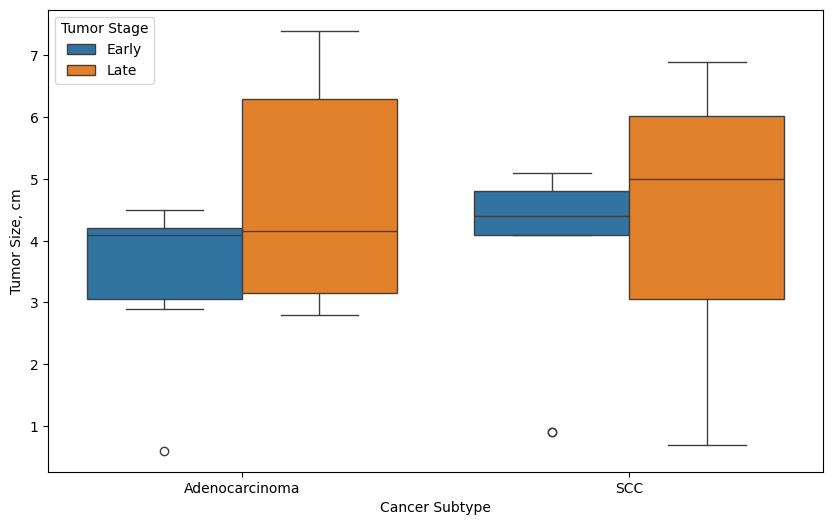

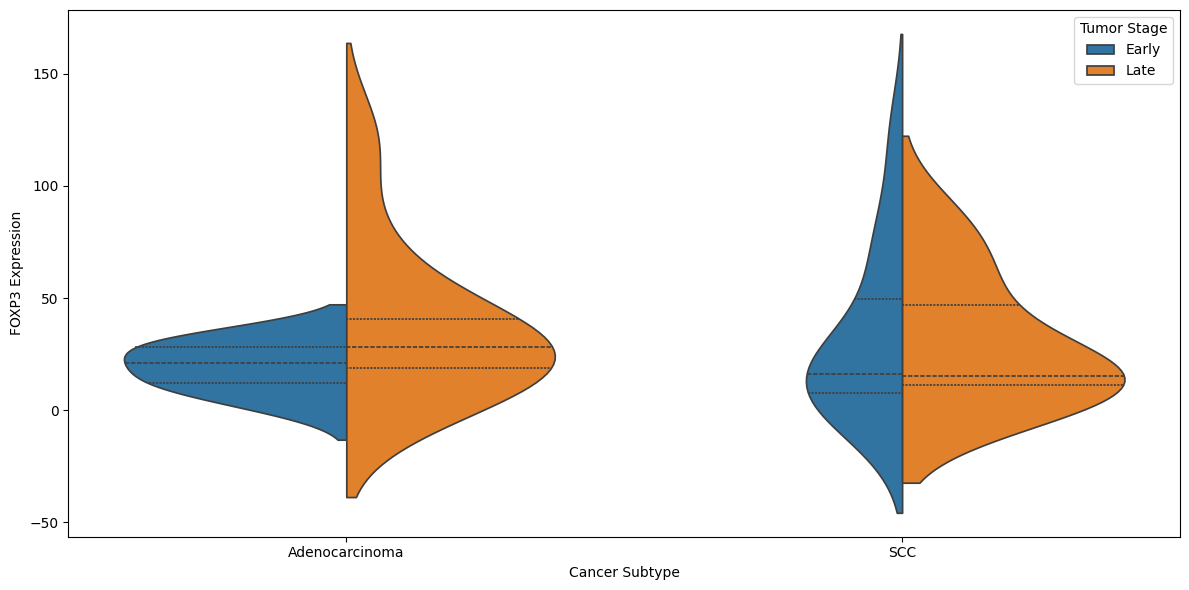

In [17]:
subtype_map = {1: 'SCC', 2: 'Adenocarcinoma'}
df['subtype_name'] = df['subtype'].map(subtype_map)

tumor_stage_map = {0.0: 'Early', 1.0: 'Late'}
df['stage_name'] = df['stage_binary'].map(tumor_stage_map)

# 1. Box plots for tumor size comparisons between stages and subtypes
plt.figure(figsize=(10, 6))
sns.boxplot(x='subtype_name', y='size_cm', hue='stage_name', data=df)
# plt.title('Tumor Size Comparison by Cancer Subtype and Stage')
plt.xlabel('Cancer Subtype')
plt.ylabel('Tumor Size, cm')
plt.legend(title='Tumor Stage')
plt.show()

# 5. Violin plots for FOXP3 expression by cancer subtype and stage
plt.figure(figsize=(12, 6))
sns.violinplot(x='subtype_name', y='foxp3', hue='stage_name', 
               split=True, inner="quartile", data=df, legend='full')
# plt.title('FOXP3 Expression by Cancer Subtype and Stage')
plt.xlabel('Cancer Subtype')
plt.ylabel('FOXP3 Expression')
plt.legend(title='Tumor Stage')

plt.tight_layout()

plt.show()